In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
mnist = tf.keras.datasets.mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

2024-12-05 11:49:23.487593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733395763.500664   59381 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733395763.504658   59381 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 11:49:23.519415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
noise_factor = 0.8

x_train_noise = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noise = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 


x_train_noise = tf.clip_by_value(x_train_noise, clip_value_min=0., clip_value_max=1.)
x_test_noise = tf.clip_by_value(x_test_noise, clip_value_min=0., clip_value_max=1.)


I0000 00:00:1733395767.252563   59381 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1179 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


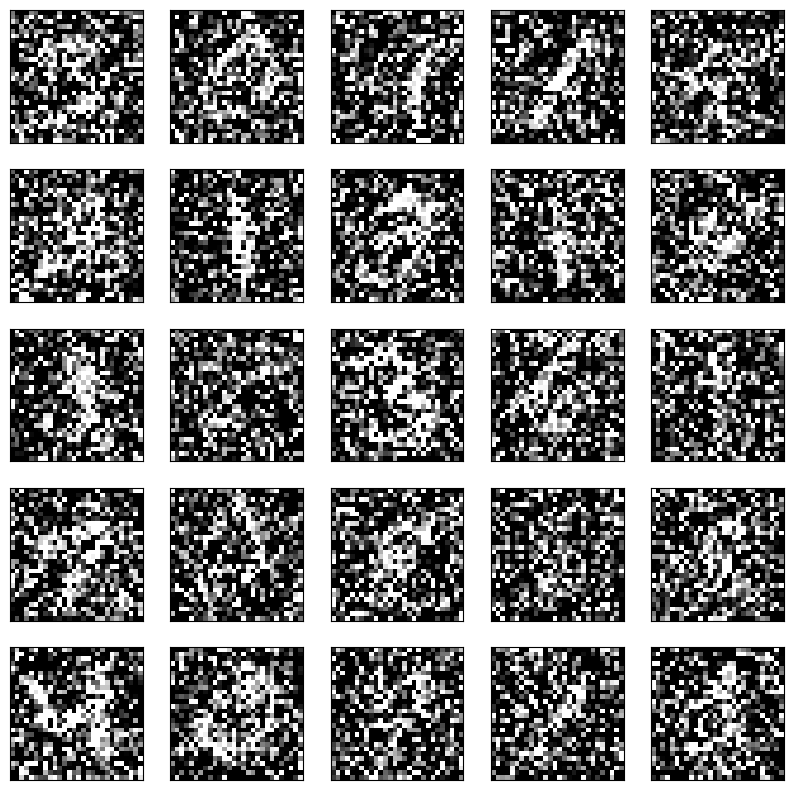

In [3]:
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    fig = plt.imshow(tf.squeeze(x_train_noise[idx]), cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [4]:
class Denoise(tf.keras.Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
      tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding="same")])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(48, kernel_size=(3, 3), strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2DTranspose(24, kernel_size=(3, 3), strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()


In [6]:
import gc
gc.collect()

1017

In [5]:
autoencoder.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy()
              )

In [6]:
autoencoder.fit(x_train_noise, x_train,
                epochs=50,
                shuffle=True,
                batch_size=512,
                validation_data=(x_test_noise, x_test))


Epoch 1/50


I0000 00:00:1733395814.320677   59445 service.cc:148] XLA service 0x71839400ad10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733395814.320701   59445 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-05 11:50:14.349158: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733395814.492187   59445 cuda_dnn.cc:529] Loaded cuDNN version 90300


 16/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6542

I0000 00:00:1733395817.351189   59445 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.4726 - val_loss: 0.2162
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2020 - val_loss: 0.1754
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1739 - val_loss: 0.1664
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1666 - val_loss: 0.1618
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1626 - val_loss: 0.1588
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1599 - val_loss: 0.1568
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1580 - val_loss: 0.1556
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1566 - val_loss: 0.1538
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1554 - val_loss: 0.1527
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1540 - val_loss: 0.1516
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1530 - val_loss: 0.1511
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/ste

KeyboardInterrupt: 

In [7]:
decoded_imgs = autoencoder.predict(x_test_noise)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


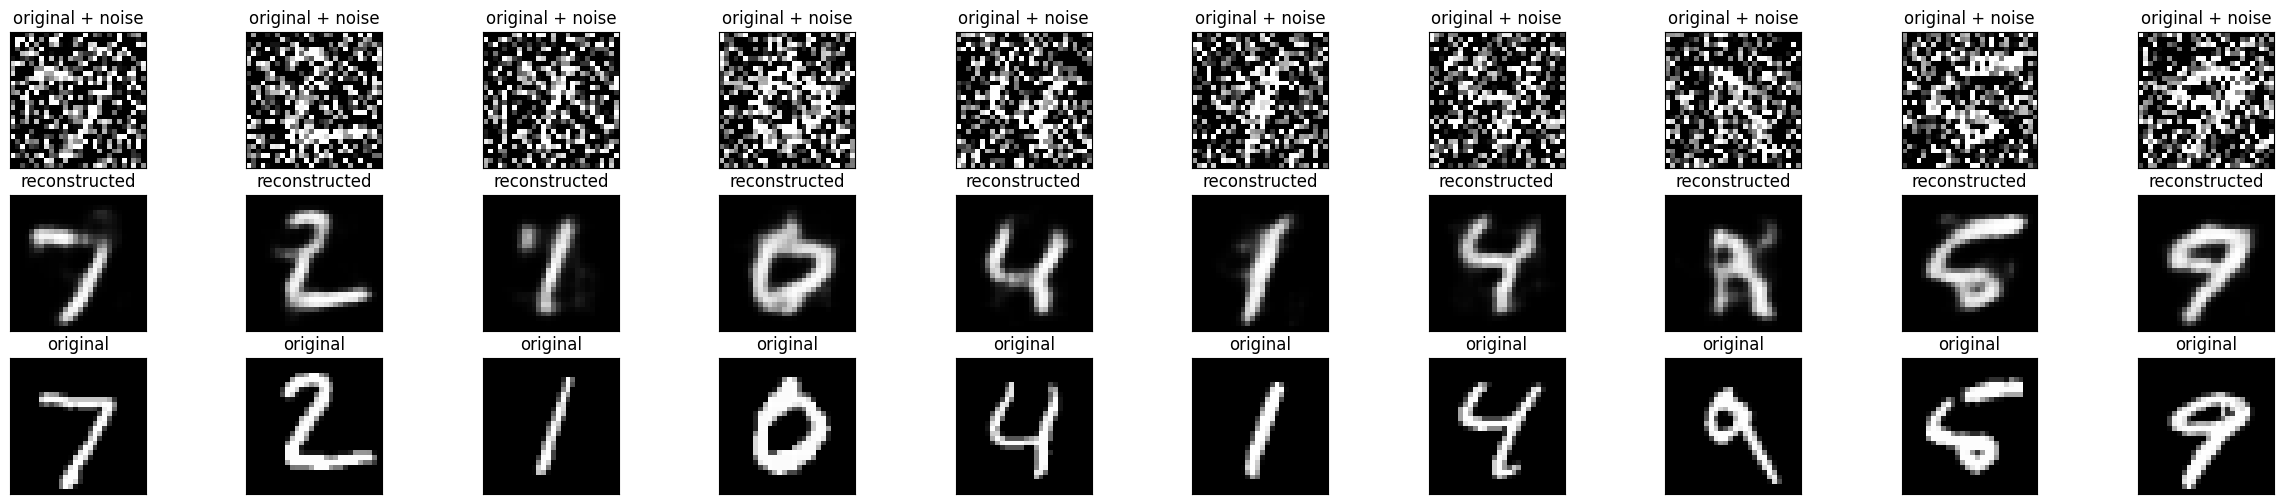

In [8]:
n = 10
plt.figure(figsize=(30, 6))
for i in range(n):

    # display original + noise
    ax = plt.subplot(3, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
    
    # display original
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
